In [1]:
import fispact_dedx as fd

In [2]:
reaction = 'Ru-p'
density = 10.28
dentisy = 12.2
SRIM_EXECUTABLE_DIRECTORY = "/home/alletro/SRIM"
energy, projected_range = fd.projectile_range(reaction, density, SRIM_EXECUTABLE_DIRECTORY)
energy = energy

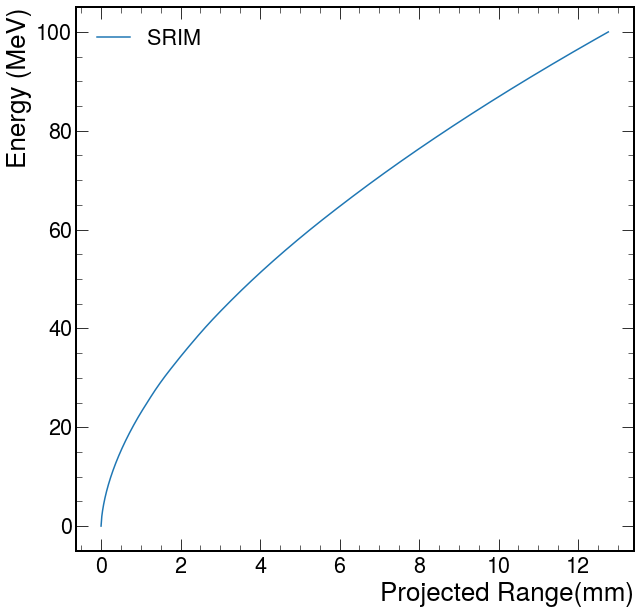

In [3]:
fd.plotting_projected_range(energy, projected_range)

In [4]:
top_energy = 40 #MeV
group_structure = 162
current = 10e-6 #Amps
flux = fd.current_to_flux(10e-6, charge=1) #amps -> /cm2/s
thickness, lower_energy, upper_energy, flux_dic = fd.group_structure_thickness(energy, projected_range, group_structure, top_energy, flux)

In [5]:
projectile = 'p'
element = 'Ru'
density = '12.2'
flux = fd.current_to_flux(10e-6, charge=1)
groupset = '162'
reaction = 'ru-p'
inventory = True
arb_flux = False
root_dir = "/home/alletro/fispact/mo_a" 
fd.create_files(root_dir, reaction, density, groupset, upper_energy, lower_energy, thickness, flux, inventory, arb_flux, flux_dic)

In [ ]:
fd.execute_run(root_dir)

Simulation TENDL-2017 to calculate 5200000.0MeV yield
 collapse: cpu time = 0.637     secs. 
     0 Fatal errors,    0 Errors and  1199 Warnings, for details see log file.
 inventory:cpu time =  1.35     secs.   No errors/warnings
Simulation TENDL-2017 to calculate 9800000.0MeV yield
 collapse: cpu time = 0.761     secs. 
     0 Fatal errors,    0 Errors and  1199 Warnings, for details see log file.
 inventory:cpu time =  1.16     secs.   No errors/warnings
Simulation TENDL-2017 to calculate 6200000.0MeV yield
 collapse: cpu time = 0.668     secs. 
     0 Fatal errors,    0 Errors and  1199 Warnings, for details see log file.
 inventory:cpu time = 0.880     secs.   No errors/warnings
Simulation TENDL-2017 to calculate 30000000.0MeV yield
 collapse: cpu time = 0.880     secs. 
     0 Fatal errors,    0 Errors and  1199 Warnings, for details see log file.
 inventory:cpu time =  1.81     secs.   No errors/warnings
Simulation TENDL-2017 to calculate 18000000.0MeV yield
 collapse: cpu time 